## Outro exemplo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.formula.api as sm

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Lessalc/Inferencia/main/geo.txt')
df.drop(columns=['Id'], inplace=True)

In [3]:
df.shape

(54, 6)

In [4]:
df.describe()

,Preco,Area,Dist,Coef_Aprov,ACL_DECL,Frente
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,41296.296296,457.483519,284.259259,2.111111,0.930556,26.945185
std,16488.566227,261.527053,183.525247,0.743948,0.088177,17.570752
min,20000.000000,293.220000,40.000000,1.500000,0.750000,10.010000
25%,30000.000000,355.087500,200.000000,1.500000,0.900000,12.370000
50%,40000.000000,380.360000,200.000000,1.500000,1.000000,16.120000
75%,50000.000000,470.087500,500.000000,3.000000,1.000000,39.975000
max,120000.000000,2057.570000,650.000000,3.000000,1.000000,75.400000


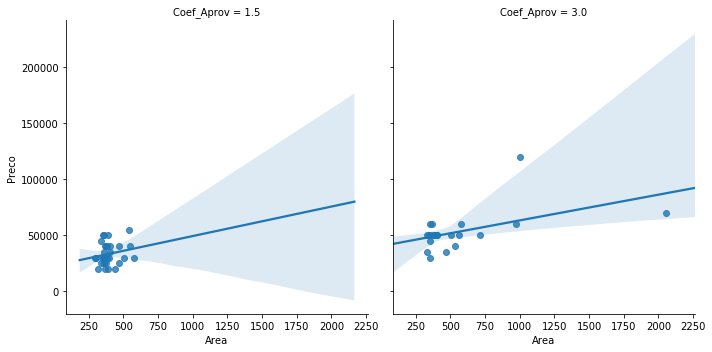

In [5]:
sns.lmplot(x = 'Area', y = 'Preco', data = df, col='Coef_Aprov');

In [6]:
# Acrescentando o LN(Preco)
df['LNPreco'] = df['Preco'].apply(np.log)

In [7]:
df.head()

,Preco,Area,Dist,Coef_Aprov,ACL_DECL,Frente,LNPreco
0,25000,359.87,200,1.5,0.75,19.00,10.126631
1,45000,353.12,500,3.0,1.00,12.18,10.714418
2,45000,341.89,40,1.5,1.00,14.98,10.714418
3,20000,435.99,200,1.5,0.75,12.18,9.903488
4,25000,341.77,500,1.5,0.75,12.93,10.126631


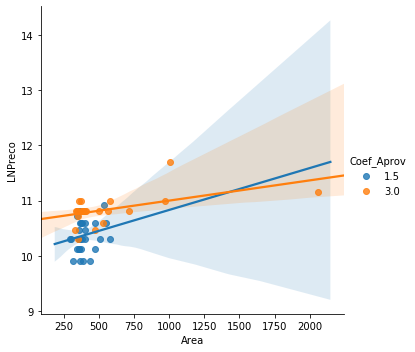

In [8]:
sns.lmplot(x = 'Area', y = 'LNPreco', data = df, hue='Coef_Aprov');

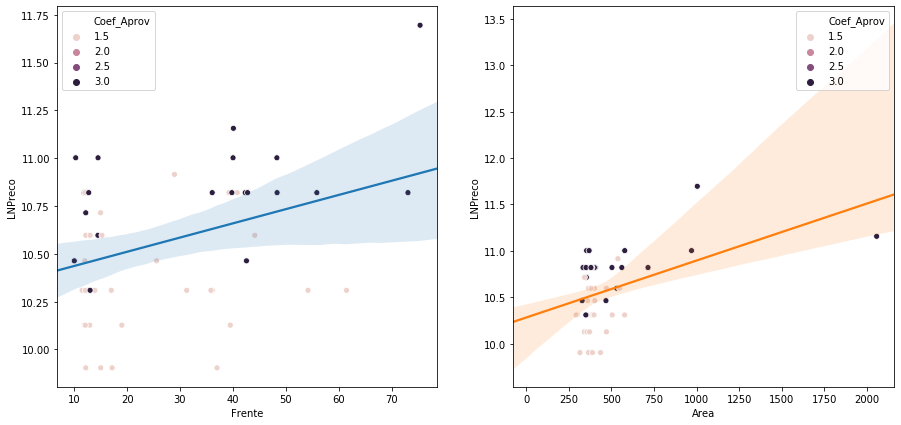

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15,7))

sns.scatterplot(ax = axes[0], x = 'Frente', y = 'LNPreco', data = df, hue='Coef_Aprov')
sns.regplot(ax = axes[0], x = 'Frente', y = 'LNPreco', scatter= None, data = df)

sns.scatterplot(ax = axes[1],  x = 'Area', y = 'LNPreco', data = df, hue='Coef_Aprov')
sns.regplot(ax = axes[1], x = 'Area', y = 'LNPreco', scatter= None, data = df)

In [10]:
# Modelo usando o Preço
modelo1 = LinearRegression()
X1 = df.loc[:,['Area','Dist','Coef_Aprov','ACL_DECL','Frente']]
y1 = df.loc[:,'Preco'].values.reshape(-1,1)
modelo1.fit(X1, y1)
modelo1.score(X1,y1)

0.5883022243050506

In [11]:
# Modelo usando o LN(Preço)
modelo2 = LinearRegression()
X2 = df.loc[:,['Area','Dist','Coef_Aprov','ACL_DECL','Frente']]
y2 = df.loc[:,'LNPreco'].values.reshape(-1,1)
modelo2.fit(X2, y2)
modelo2.score(X2,y2)

0.6980736131901512

In [12]:
modelo3 = sm.ols(formula = 'Preco ~ Area+Dist+Coef_Aprov+ACL_DECL+Frente', data = df)
modelo3 = modelo3.fit()
modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Preco   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     13.72
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           2.52e-08
Time:                        18:50:18   Log-Likelihood:                -576.52
No. Observations:                  54   AIC:                             1165.
Df Residuals:                      48   BIC:                             1177.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.903e+04   1.76e+04     -2.219      0.031   -7.44e+04   -3662.054
Area          16.6251      6.647      2.501      0.016       3.260      29.991
Dist          -3.9370      9.020     -0.436      0.664     -22.073      14.199
Coef_Aprov  8088.6255   2270.095      3.563      0.001    3524.294    1.27e+04
ACL_DECL    5.471e+04   1.83e+04      2.987      0.004    1.79e+04    9.15e+04
Frente       217.2639     95.773      2.269      0.028      24.700     409.828
==============================================================================
Omnibus:                       48.606   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.369
Skew:                           2.326   Prob(JB):                     2.61e-55
Kurtosis:                      12.491   Cond. No.                     9.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
modelo4 = sm.ols(formula = 'LNPreco ~ Area+Dist+Coef_Aprov+ACL_DECL+Frente', data = df)
modelo4 = modelo4.fit()
modelo4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LNPreco   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     22.20
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           1.88e-11
Time:                        18:50:18   Log-Likelihood:                 11.077
No. Observations:                  54   AIC:                            -10.15
Df Residuals:                      48   BIC:                             1.780
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1297      0.331     24.575      0.000       7.465       8.795
Area           0.0002      0.000      1.998      0.051   -1.61e-06       0.001
Dist       -3.722e-05      0.000     -0.219      0.827      -0.000       0.000
Coef_Aprov     0.1943      0.043      4.553      0.000       0.109       0.280
ACL_DECL       1.9415      0.344      5.637      0.000       1.249       2.634
Frente         0.0041      0.002      2.304      0.026       0.001       0.008
==============================================================================
Omnibus:                       10.247   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                9.857
Skew:                           0.935   Prob(JB):                      0.00724
Kurtosis:                       3.940   Cond. No.                     9.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
valor_novo = np.array([260,180,0.75,1,30])
valor_novodf = pd.DataFrame(valor_novo.reshape(1,-1))
colunas2 = ['Area','Dist','Coef_Aprov','ACL_DECL','Frente']
valor_novodf.columns = colunas2
valor_novodf.head()

print(modelo1.predict(valor_novo.reshape(1,-1)))
print(np.exp(modelo2.predict(valor_novo.reshape(1,-1))))
print(modelo3.predict(valor_novodf))
print(np.exp(modelo4.predict(valor_novodf)))

[[31877.22091867]]
[[32848.74354921]]
0    31877.220919
dtype: float64
0    32848.743549
dtype: float64


### Avaliando Usando variações da Regressão Lineares

In [15]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [16]:
lr = LinearRegression().fit(X2, y2)

print("Score de Treinamento: {:.3f}".format(lr.score(X2, y2)))

Score de Treinamento: 0.698


### Ridge Regression
- Trata-se de uma regressão linear que usa o mesmo princípio dos mínimos quadrados.
- A ideia aqui é diminuir ao máximo as inclinações (coeficiente) dos parâmetros.
- Os valores maiores de Alpha forçam os coeficiente a irem mais próximo de 0. 

In [17]:
# Usando Ridge - Regularização dos atributos
ridge = Ridge().fit(X2, y2)
print("Score de Treinamento: {:.3f}".format(ridge.score(X2, y2)))

ridge10 = Ridge(alpha=10).fit(X2, y2)
print("Score de Treinamento: {:.3f}".format(ridge10.score(X2, y2)))

ridge01 = Ridge(alpha=0.1).fit(X2, y2)
print("Score de Treinamento: {:.3f}".format(ridge01.score(X2, y2)))

Score de Treinamento: 0.592
Score de Treinamento: 0.495
Score de Treinamento: 0.689


### Lasso Regression
- Assim como no ridge regression, usar o Lasso também restringe coeficientes para que fiquem próximos de 0
- Alguns dos coeficientes serão exatamente 0, ou seja, alguns atributos são totalmente ignorados no modelo. 

In [18]:
lasso = Lasso().fit(X2, y2)
print("Score de Treinamento: {:.3f}".format(lasso.score(X2, y2)))
print("Numero de atributos usados: {}".format(np.sum(lasso.coef_ != 0)))

# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X2, y2)
print("Score de Treinamento: {:.3f}".format(lasso001.score(X2, y2)))
print("Numero de atributos usados: {}".format(np.sum(lasso001.coef_ != 0)))

# Vamos voltar par o overfittign
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X2, y2)
print("Score de Treinamento: {:.3f}".format(lasso00001.score(X2, y2)))
print("Numero de atributos usados: {}".format(np.sum(lasso00001.coef_ != 0)))

Score de Treinamento: 0.236
Numero de atributos usados: 3
Score de Treinamento: 0.589
Numero de atributos usados: 5
Score de Treinamento: 0.698
Numero de atributos usados: 5


### Modelo de Regressão k-NN - Modelo não Linear 

In [19]:
from sklearn.neighbors import KNeighborsRegressor

In [20]:
lista_n = [2,3,5,7,9]
for n in lista_n:
    reg = KNeighborsRegressor(n_neighbors=n)
    reg.fit(X2, y2)
    print("R²: {:.3f}".format(reg.score(X2, y2))) 

R²: 0.557
R²: 0.516
R²: 0.352
R²: 0.237
R²: 0.213
